In [1]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
dirname = 'D:/crs/proj/2022_runup/'
fname = 'hom_profiles.csv'
fpath = dirname+fname

In [1]:
# hand calculation of slope from bar crest to zero NAVD88
bs2020 = 5.273/(596.6-159.3)
bs2021 = 5.15/(599.85-173.9)
bs2022 = 5.21/(633.99-170.69)
print('bs2020: {:.04f}\nbs2021: {:.04f}\nbs2022: {:.04f}\n'.format(bs2020,bs2021,bs2022))

bs2020: 0.0121
bs2021: 0.0121
bs2022: 0.0112



In [3]:
# The .csv profile files written by Global Mapper have some weird characters we want to get rid of.
# Read in the file
with open(fpath, 'r') as f :
  filedata = f.read()

# Replace the target strings
filedata = filedata.replace('%', '')
#filedata = filedata.replace('-', '') #this will remove negative values!

# Write the file out again with new name
new_fname = 'mod_'+fname
new_fpath = dirname+new_fname
with open(new_fpath, 'w') as f:
  f.write(filedata)

# read the profile
df=pd.read_csv(new_fpath,header = 0,delimiter=',')
df

,ID,X,Y,Elevation,Elevation (2020015FA_Truro_topobathy_1m.tif),Elevation (2021014FA_Truro_topobathy_1m.tif),Elevation (2022015FA_Truro_Topobathy_1m.tif),Distance (Segment),Distance (Total),Distance 3D (Segment),Distance 3D (Total),Slope (Degrees),Slope (Percent),Segment Index
0,1,410754.987,4656015.953,16.989,16.850,16.674,16.989,0.000,0.000,0.000,0.000,-,-,1
1,2,410755.424,4656016.639,16.946,16.895,16.687,16.946,0.813,0.813,0.814,0.814,3.0,5.2,1
2,3,410755.860,4656017.324,16.854,16.922,16.679,16.854,0.813,1.626,0.818,1.632,6.5,11.4,1
3,4,410756.297,4656018.009,16.783,16.929,16.644,16.783,0.813,2.438,0.816,2.448,5.0,8.7,1
4,5,410756.733,4656018.695,16.764,16.903,16.563,16.764,0.813,3.251,0.813,3.261,1.4,2.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1020,411199.746,4656714.365,-9.275,NaN,-9.453,-9.275,0.813,828.250,0.813,831.670,1.5,2.5,1
1020,1021,411200.182,4656715.051,-9.295,NaN,-9.470,-9.295,0.813,829.070,0.813,832.480,1.4,2.5,1
1021,1022,411200.619,4656715.736,-9.316,NaN,-9.487,-9.316,0.813,829.880,0.813,833.300,1.4,2.5,1
1022,1023,411201.055,4656716.422,-9.336,NaN,-9.505,-9.336,0.813,830.690,0.813,834.110,1.4,2.5,1


In [4]:
# extract profiles, flip so the are oriented onshore, calculate distance and slope
dist = df['Distance (Total)'].values
odist = np.flip( dist[-1]-dist )
elev2020 = np.flip( df['Elevation (2020015FA_Truro_topobathy_1m.tif)'].values )
elev2021 = np.flip( df['Elevation (2021014FA_Truro_topobathy_1m.tif)'].values )
elev2022 = np.flip( df['Elevation (2022015FA_Truro_Topobathy_1m.tif)'].values )

dx = np.diff(dist)
slope2020 = np.nan*np.ones_like(dist)
slope2020[1:]=np.diff(elev2020)/dx
slope2021 = np.nan*np.ones_like(dist)
slope2021[1:]=np.diff(elev2021)/dx
slope2022 = np.nan*np.ones_like(dist)
slope2022[1:]=np.diff(elev2022)/dx

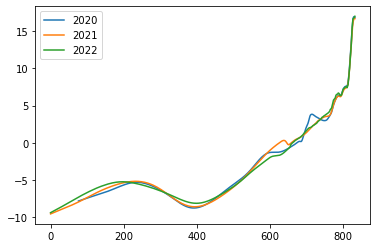

In [5]:
plt.plot(odist,elev2020,label='2020')
plt.plot(odist,elev2021,label='2021')
plt.plot(odist,elev2022,label='2022')
plt.legend()

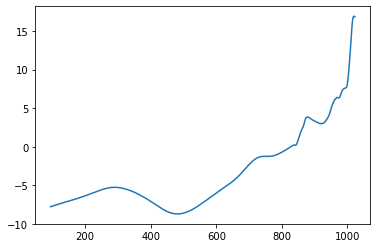

In [6]:
plt.plot(elev2020)

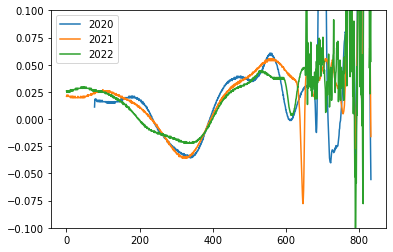

In [7]:
plt.plot(odist,slope2020,label='2020')
plt.plot(odist,slope2021,label='2021')
plt.plot(odist,slope2022,label='2022')
plt.ylim([-.1,.1])
plt.legend()

In [8]:
# offshore slope is -0.025

In [9]:
slope2021[425]

-0.03209876543209843

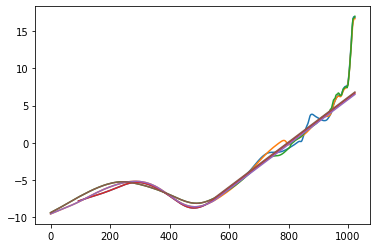

In [20]:
# make beach slope
f_slope = 0.037
beach_slope = 0.037
bstart = 550
beach_dist = dist.copy()
fake_elev2022 = elev2022.copy()
fake_elev2022[nstart:]=fake_elev2022[bstart-1]+(beach_dist[bstart:]-beach_dist[nstart-1])*beach_slope
fake_elev2021 = elev2021.copy()
fake_elev2021[nstart:]=fake_elev2021[bstart-1]+(beach_dist[bstart:]-beach_dist[nstart-1])*beach_slope
fake_elev2020 = elev2020.copy()
fake_elev2020[nstart:]=fake_elev2020[bstart-1]+(beach_dist[bstart:]-beach_dist[nstart-1])*beach_slope

plt.plot(elev2020)
plt.plot(elev2021)
plt.plot(elev2022)
plt.plot(fake_elev2020)
plt.plot(fake_elev2021)
plt.plot(fake_elev2022)

In [ ]:
# fill offshore missing values for 2020
fake_elev2020[0:115]=fake_elev2021[0:115]
plt.plot(fake_elev2020[50:150])

In [90]:
# make offshore slope
off_slope = 0.025
# offshore padding needed
print('dz2020 = ', 15+fake_elev2020[0], 'dx = ',(15+fake_elev2020[0]) / off_slope )
print('dz2021 = ', 15+fake_elev2021[0])
print('dz2022 = ', 15+fake_elev2022[0], 'dx = ',(15+fake_elev2022[0]) / off_slope )

dz2020 =  5.478 dx =  219.11999999999998
dz2021 =  5.478
dz2022 =  5.643000000000001 dx =  225.72000000000003


In [40]:
dxx = np.median(dx)

In [94]:
xx = 225
off_dist = np.linspace(0.,xx,int(xx/dxx))
print(off_dist)
off_slope2021 = (15+fake_elev2021[0])/(xx+dxx)
off_elev2021 = -15+off_dist*off_slope2021
print(off_slope2021)
print(off_elev2021)
print(fake_elev2021[0])

[  0.           0.81521739   1.63043478   2.44565217   3.26086957
   4.07608696   4.89130435   5.70652174   6.52173913   7.33695652
   8.15217391   8.9673913    9.7826087   10.59782609  11.41304348
  12.22826087  13.04347826  13.85869565  14.67391304  15.48913043
  16.30434783  17.11956522  17.93478261  18.75        19.56521739
  20.38043478  21.19565217  22.01086957  22.82608696  23.64130435
  24.45652174  25.27173913  26.08695652  26.90217391  27.7173913
  28.5326087   29.34782609  30.16304348  30.97826087  31.79347826
  32.60869565  33.42391304  34.23913043  35.05434783  35.86956522
  36.68478261  37.5         38.31521739  39.13043478  39.94565217
  40.76086957  41.57608696  42.39130435  43.20652174  44.02173913
  44.83695652  45.65217391  46.4673913   47.2826087   48.09782609
  48.91304348  49.72826087  50.54347826  51.35869565  52.17391304
  52.98913043  53.80434783  54.61956522  55.43478261  56.25
  57.06521739  57.88043478  58.69565217  59.51086957  60.32608696
  61.14130435  61

In [95]:
off_slope2022 = (15+fake_elev2022[0])/(xx+dxx)
off_elev2022 = -15+off_dist*off_slope2022
print(off_slope2022)
print(off_elev2022)
print(fake_elev2022[0])

0.024990035870864888
[-15.         -14.97962769 -14.95925538 -14.93888306 -14.91851075
 -14.89813844 -14.87776613 -14.85739382 -14.83702151 -14.81664919
 -14.79627688 -14.77590457 -14.75553226 -14.73515995 -14.71478763
 -14.69441532 -14.67404301 -14.6536707  -14.63329839 -14.61292607
 -14.59255376 -14.57218145 -14.55180914 -14.53143683 -14.51106452
 -14.4906922  -14.47031989 -14.44994758 -14.42957527 -14.40920296
 -14.38883064 -14.36845833 -14.34808602 -14.32771371 -14.3073414
 -14.28696909 -14.26659677 -14.24622446 -14.22585215 -14.20547984
 -14.18510753 -14.16473521 -14.1443629  -14.12399059 -14.10361828
 -14.08324597 -14.06287365 -14.04250134 -14.02212903 -14.00175672
 -13.98138441 -13.9610121  -13.94063978 -13.92026747 -13.89989516
 -13.87952285 -13.85915054 -13.83877822 -13.81840591 -13.7980336
 -13.77766129 -13.75728898 -13.73691667 -13.71654435 -13.69617204
 -13.67579973 -13.65542742 -13.63505511 -13.61468279 -13.59431048
 -13.57393817 -13.55356586 -13.53319355 -13.51282123 -13.

In [97]:
full_dist = np.concatenate( ( off_dist, (dist + dxx + off_dist[-1])) )

In [98]:
full_2022_elev = np.concatenate( (off_elev2022, fake_elev2022) ) 
full_2021_elev = np.concatenate( (off_elev2021, fake_elev2021) ) 
full_2020_elev = np.concatenate( (off_elev2021, fake_elev2020) )

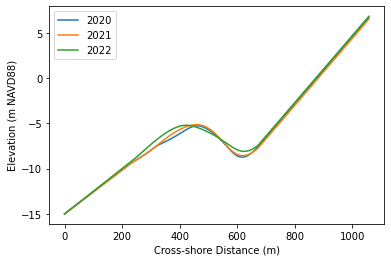

In [101]:
plt.plot(full_dist, full_2020_elev,label='2020')
plt.plot(full_dist, full_2021_elev,label='2021')
plt.plot(full_dist, full_2022_elev,label='2022')
plt.xlabel('Cross-shore Distance (m)')
plt.ylabel('Elevation (m NAVD88)')
plt.legend()

In [128]:
# Want to smooth over about N meters...how many points is that for the filter window?
nmeters = 20.
npts = int(nmeters/dxx)
print('npts=',npts)
print(np.shape(full_2020_elev))
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

e2020 = smooth(full_2020_elev, npts)
e2021 = smooth(full_2021_elev, npts)
e2022 = smooth(full_2022_elev, npts)

print(np.shape(e2020))
e2020[0:11]

npts= 24
(1301,)
(1301,)


array([ -7.44561427,  -8.06072595,  -8.67501361,  -9.28847724,
        -9.90111685, -10.51293243, -11.12392398, -11.73409151,
       -12.34343501, -12.95195449, -13.55964993])

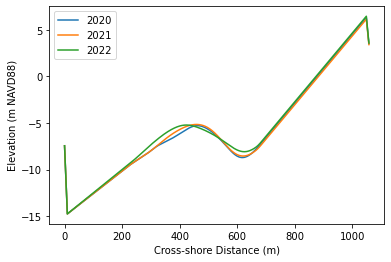

In [127]:
plt.plot(full_dist, e2020,label='2020')
plt.plot(full_dist, e2021,label='2021')
plt.plot(full_dist, e2022,label='2022')
plt.xlabel('Cross-shore Distance (m)')
plt.ylabel('Elevation (m NAVD88)')
plt.legend()

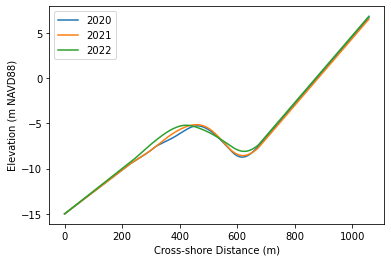

In [150]:
# Want to smooth over about N meters...how many points is that for the filter window?
nmeters = 20.
npts = int(nmeters/dxx)
# npts must be odd
if (npts % 2) == 0:
    npts = npts+1

# smooth with Savitsky-Golay filter
e2020 = savgol_filter(full_2020_elev, npts, 3, mode='constant',cval=np.nan) # window size npts, polynomial order 3
e2021 = savgol_filter(full_2021_elev, npts, 3, mode='constant',cval=np.nan) # window size npts, polynomial order 3
e2022 = savgol_filter(full_2022_elev, npts, 3, mode='constant',cval=np.nan) # window size npts, polynomial order 3

#fix the ends...these have constant slopes, so just replace with unfiltered data
nbad = int(npts/2)
e2020[0:nbad]=full_2020_elev[0:nbad]
e2020[-(nbad+1):]=full_2020_elev[-(nbad+1):]
e2021[0:nbad]=full_2021_elev[0:nbad]
e2021[-(nbad+1):]=full_2021_elev[-(nbad+1):]
e2022[0:nbad]=full_2022_elev[0:nbad]
e2022[-(nbad+1):]=full_2022_elev[-(nbad+1):]

plt.plot(full_dist, e2020,label='2020')
plt.plot(full_dist, e2021,label='2021')
plt.plot(full_dist, e2022,label='2022')
plt.xlabel('Cross-shore Distance (m)')
plt.ylabel('Elevation (m NAVD88)')
plt.legend()

In [151]:
np.sum(np.isnan(e2020+e2021+e2022))

0

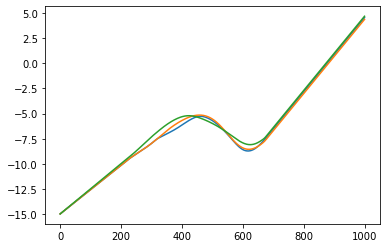

In [152]:
# Determine model grid and interpolate at model dxm
dxm = 0.5
xstart = 0.
xend = 1000.
xm = np.arange(xstart, xend+dxm, dxm)

f2020 = interp1d(full_dist, e2020)
em2020 = f2020(xm)

f2021 = interp1d(full_dist, e2021)
em2021 = f2021(xm)

f2022 = interp1d(full_dist, e2022)
em2022 = f2022(xm)

plt.plot(xm, em2020,label='2020')
plt.plot(xm, em2021,label='2021')
plt.plot(xm, em2022,label='2022')
plt.xlabel('Cross-shore Distance (m)')
plt.ylabel('Elevation (m NAVD88)')
plt.legend()

In [158]:
np.savetxt('D:/crs/proj/2022_SWASH/HoM/hom2020.bot', em2020, fmt='%.3f', delimiter=",")
np.savetxt('D:/crs/proj/2022_SWASH/HoM/hom2021.bot', em2021, fmt='%.3f', delimiter=",")
np.savetxt('D:/crs/proj/2022_SWASH/HoM/hom2022.bot', em2022, fmt='%.3f', delimiter=",")